In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cluster_utils as utl

In [68]:
group1 = ['data/teams/89-90team.csv', 'data/teams/90-91team.csv',
          'data/teams/91-92team.csv', 'data/teams/92-93team.csv',
          'data/teams/93-94team.csv']

group2 = ['data/teams/94-95team.csv', 'data/teams/95-96team.csv',
          'data/teams/96-97team.csv', 'data/teams/97-98team.csv',
          'data/teams/98-99team.csv']

group3 = ['data/teams/99-00team.csv', 'data/teams/00-01team.csv',
          'data/teams/01-02team.csv', 'data/teams/02-03team.csv',
          'data/teams/03-04team.csv']

group4 = ['data/teams/05-06team.csv', 'data/teams/06-07team.csv',
          'data/teams/07-08team.csv', 'data/teams/08-09team.csv',
          'data/teams/09-10team.csv']

group5 = ['data/teams/10-11team.csv', 'data/teams/11-12team.csv',
          'data/teams/12-13team.csv', 'data/teams/13-14team.csv',
          'data/teams/14-15team.csv']

group6 = ['data/teams/15-16team.csv', 'data/teams/16-17team.csv',
          'data/teams/17-18team.csv', 'data/teams/18-19team.csv',
          'data/teams/19-20team.csv']

In [69]:
def combine_seasons_teams(seasons):
    # load first season of group
    final = pd.read_csv(seasons[0])
    final = final[['Rk', 'Team', 'GP', 'W', 'L', 'PTS', 'PTS%', 'GF', 'GA',
            'GF/G', 'GA/G', 'PP', 'PPO', 'PP%', 'PPA', 'PPOA', 'PK%',
            'SH','SHA', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SA', 'SV%', 'SO']]

    # final = final.drop_duplicates(subset='Id', keep="first")

    for season in seasons[1:]:
        df = pd.read_csv(season)
        df = df[['Rk', 'Team', 'GP', 'W', 'L', 'PTS', 'PTS%', 'GF', 'GA', 'SRS',
                'SOS', 'GF/G', 'GA/G', 'PP', 'PPO', 'PP%', 'PPA', 'PPOA', 'PK%',
                'SH','SHA', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SA', 'SV%', 'SO']]

        final = pd.concat([final, df])

    # group by player ID and get mean stats
    final = final.groupby(['Team']).agg({'Rk': 'first',
                                        'GP': 'sum',
                                        'W': 'sum',
                                        'L': 'sum',
                                        'PTS': 'sum',
                                        'PTS%': 'mean',
                                        'GF': 'sum',
                                        'GA': 'sum',
                                        'GF/G': 'mean',
                                        'GA/G': 'sum',
                                        'PP': 'sum',
                                        'PPO': 'sum',
                                        'PP%': 'mean',
                                        'PPA': 'sum',
                                        'PPOA': 'sum',
                                        'PK%': 'mean',
                                        'SH': 'sum',
                                        'SHA': 'sum',
                                        'PIM/G': 'mean',
                                        'oPIM/G': 'mean',
                                        'S': 'sum',
                                        'S%': 'mean',
                                        'SA': 'sum',
                                        'SV%': 'mean',
                                        'SO': 'sum'})

    final = final.reset_index()

    return final

In [71]:
group1 = combine_seasons_teams(group1)
group2 = combine_seasons_teams(group2)
group3 = combine_seasons_teams(group3)
group4 = combine_seasons_teams(group4)
group5 = combine_seasons_teams(group5)
group6 = combine_seasons_teams(group6)

# group1.to_csv('data/groups/group1team.csv', index=False)
# group2.to_csv('data/groups/group2team.csv', index=False)
# group3.to_csv('data/groups/group3team.csv', index=False)
# group4.to_csv('data/groups/group4team.csv', index=False)
# group5.to_csv('data/groups/group5team.csv', index=False)
# group6.to_csv('data/groups/group6team.csv', index=False)


In [78]:
group1t = pd.read_csv('data/groups/group1team.csv')
group2t = pd.read_csv('data/groups/group2team.csv')
group3t = pd.read_csv('data/groups/group3team.csv')
group4t = pd.read_csv('data/groups/group4team.csv')
group5t = pd.read_csv('data/groups/group5team.csv')
group6t = pd.read_csv('data/groups/group6team.csv')

In [79]:
group1t.columns

Index(['Team', 'Goon', 'Rk', 'GP', 'W', 'L', 'PTS', 'PTS%', 'GF', 'GA', 'GF/G',
       'GA/G', 'PP', 'PPO', 'PP%', 'PPA', 'PPOA', 'PK%', 'SH', 'SHA', 'PIM/G',
       'oPIM/G', 'S', 'S%', 'SA', 'SV%', 'SO'],
      dtype='object')

<AxesSubplot:xlabel='W', ylabel='Team'>

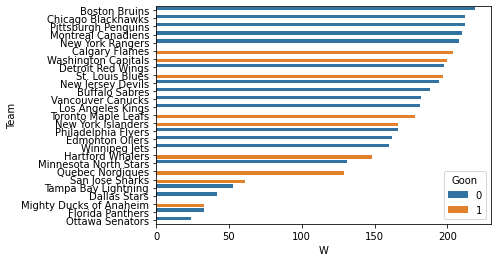

In [87]:
order = group1t.sort_values(by='W', ascending=False).Team.values
sns.barplot(data=group1t, x='W', y='Team', hue='Goon', order=order)